In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [34]:
df=pd.read_csv("salary_data_cleaned.csv")
df.head()

,Unnamed: 0,company,job title,location,job description,salary estimate,company_size,company_type,company_sector,company_industry,...,rating,python_yn,spark_yn,azure_yn,aws_yn,excel_yn,machine_learning_yn,job_simpl,seniority,description_len
0,0,Microsoft,Data & Applied Scientist,"Redmond, WA",Microsoft 365 is a key part of the company’s c...,123486.0,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,4.4,1,0,0,1,0,1,data scientist,junior,359
1,1,UT Southwestern Medical Center,Data Scientist or Bioinformatician (remote),Remote,Center Information:\nThe Quantitative Biomedic...,93500.0,10000+ Employees,Hospital,Healthcare,Health Care Services & Hospitals,...,4.0,1,0,0,0,0,1,data scientist,na,267
2,2,Notion,"Data Scientist, Growth","New York, NY",About Us:\nWe're on a mission to make it possi...,137853.0,201 to 500 Employees,Company - Private,Information Technology,Enterprise Software & Network Solutions,...,4.9,1,0,0,0,0,0,data scientist,Senior,589
3,3,Net2Aspire,Jr. Data Scientist,Remote, Apply Statistical and Machine Learning metho...,72500.0,Unknown,Company - Public,NaN,NaN,...,no rating,0,0,0,0,0,1,data scientist,junior,132
4,4,Ntropy Network,Data Scientist,Remote,"Over the last few decades, technological innov...",155000.0,1 to 50 Employees,Company - Private,NaN,NaN,...,no rating,1,0,0,1,0,0,data scientist,na,522


In [35]:
df['rating']=df['rating'].apply(lambda x: np.nan if x=='no rating' else float(x))
df['rating']

0      4.4
1      4.0
2      4.9
3      NaN
4      NaN
      ... 
540    4.2
541    4.7
542    4.2
543    4.1
544    3.8
Name: rating, Length: 545, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           545 non-null    int64  
 1   company              545 non-null    object 
 2   job title            545 non-null    object 
 3   location             545 non-null    object 
 4   job description      545 non-null    object 
 5   salary estimate      545 non-null    float64
 6   company_size         494 non-null    object 
 7   company_type         494 non-null    object 
 8   company_sector       384 non-null    object 
 9   company_industry     384 non-null    object 
 10  company_founded      342 non-null    float64
 11  company_revenue      494 non-null    object 
 12  hourly               545 non-null    int64  
 13  rating               449 non-null    float64
 14  python_yn            545 non-null    int64  
 15  spark_yn             545 non-null    int

### convert the hourly salaries into annual salaries

- if a employee works full time so he works 40 hours per week which is approximately 2000 hour per year
- so we wll muiltiply the hourly salary by 2000

In [37]:
df["salary estimate"]=df.apply(lambda x : x['salary estimate']*2000 if x['hourly']==1 else x['salary estimate'],axis=1)

In [38]:
df[df['hourly']==1]['salary estimate']

13     130000.0
21     125000.0
27      65000.0
34      80700.0
40     130000.0
41     120000.0
48      89700.0
53     190000.0
55     100000.0
57     190000.0
74     170000.0
76     190000.0
82     105000.0
84     170000.0
85     105000.0
93     170000.0
103    140000.0
104     56280.0
109    125000.0
114    115000.0
125    155000.0
126    180000.0
141    130000.0
144    125000.0
164    130000.0
167    125000.0
189    125000.0
209    130000.0
212    125000.0
232    130000.0
235    125000.0
255    130000.0
258    125000.0
277    130000.0
286    125000.0
301    130000.0
310    125000.0
325    130000.0
334    125000.0
349    130000.0
372    130000.0
395    130000.0
418    130000.0
441    130000.0
464    130000.0
487    130000.0
514    130000.0
538    130000.0
Name: salary estimate, dtype: float64

In [39]:
df['company_age']=2022-df['company_founded']
df[['company','company_age']]

,company,company_age
0,Microsoft,47.0
1,UT Southwestern Medical Center,79.0
2,Notion,6.0
3,Net2Aspire,NaN
4,Ntropy Network,NaN
...,...,...
540,i28 technologies corporation,NaN
541,Atlassian,20.0
542,The Trade Desk,13.0
543,IBM,111.0


In [40]:
df.describe()

,Unnamed: 0,salary estimate,company_founded,hourly,rating,python_yn,spark_yn,azure_yn,aws_yn,excel_yn,machine_learning_yn,description_len,company_age
count,545.00000,545.000000,342.000000,545.000000,449.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,342.000000
mean,272.00000,113138.697248,1970.728070,0.088073,4.083964,0.858716,0.078899,0.110092,0.260550,0.280734,0.794495,429.069725,51.271930
std,157.47222,24310.121688,42.168066,0.283662,0.567664,0.348635,0.269829,0.313292,0.439338,0.449771,0.404441,220.791838,42.168066
min,0.00000,10013.000000,1799.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,3.000000
25%,136.00000,102817.000000,1943.000000,0.000000,3.900000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,267.000000,23.000000
50%,272.00000,110783.000000,1982.000000,0.000000,4.200000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,418.000000,40.000000
75%,408.00000,123790.000000,1999.000000,0.000000,4.400000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,589.000000,79.000000
max,544.00000,191100.000000,2019.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2781.000000,223.000000


<AxesSubplot:>

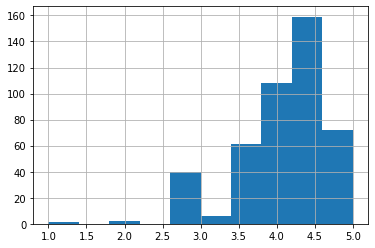

In [41]:
df['rating'].hist()

<AxesSubplot:>

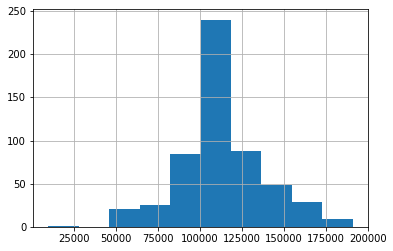

In [42]:
df['salary estimate'].hist()

<AxesSubplot:>

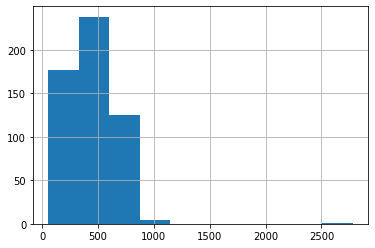

In [43]:
df['description_len'].hist()

<AxesSubplot:>

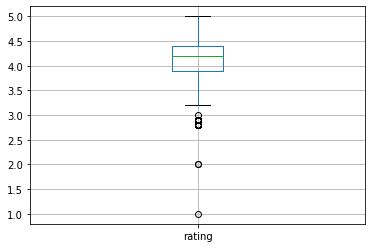

In [44]:
df.boxplot(column='rating')

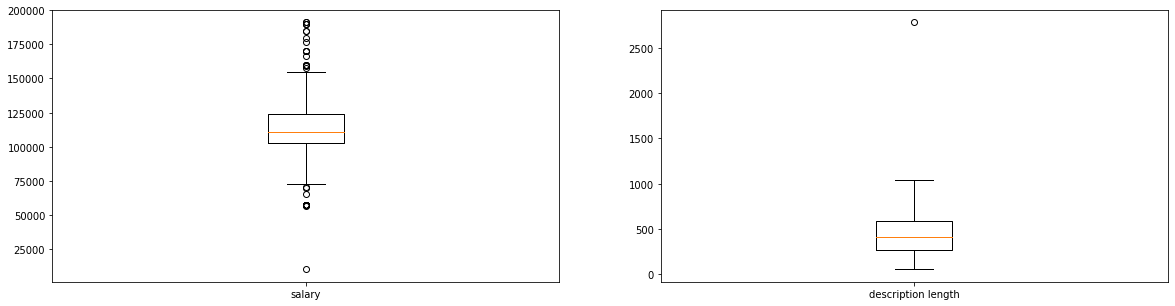

In [45]:
fig,ax=plt.subplots(1,2,figsize=(20,5))

ax[0].boxplot(data=df,x='salary estimate')
ax[0].set_xticklabels(['salary'])

ax[1].boxplot(data=df,x='description_len')
ax[1].set_xticklabels(['description length'])

plt.show()

In [46]:
corr=df[['salary estimate','rating','description_len','company_age']].corr()
corr

,salary estimate,rating,description_len,company_age
salary estimate,1.000000,0.136795,0.273729,-0.348884
rating,0.136795,1.000000,0.060478,0.071716
description_len,0.273729,0.060478,1.000000,-0.063287
company_age,-0.348884,0.071716,-0.063287,1.000000


<AxesSubplot:>

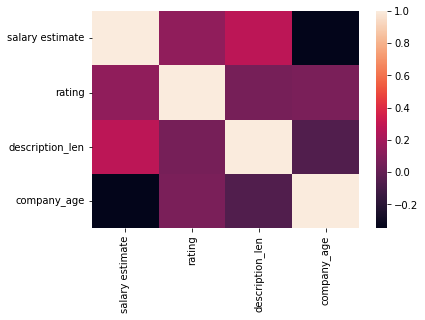

In [47]:
sns.heatmap(corr)

In [48]:

df.columns

Index(['Unnamed: 0', 'company', 'job title', 'location', 'job description',
       'salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue', 'hourly',
       'rating', 'python_yn', 'spark_yn', 'azure_yn', 'aws_yn', 'excel_yn',
       'machine_learning_yn', 'job_simpl', 'seniority', 'description_len',
       'company_age'],
      dtype='object')

In [50]:
df_cat=df[['job title', 'location','company_size', 'company_type', 'company_sector',
       'company_industry','company_revenue','python_yn', 'spark_yn', 'azure_yn', 'aws_yn', 'excel_yn',
       'machine_learning_yn', 'job_simpl', 'seniority']]

graph for job title


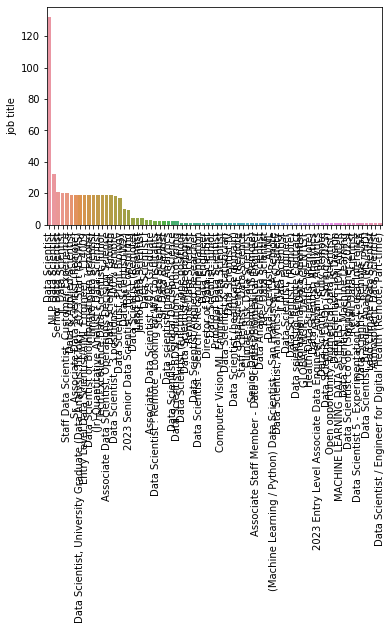

graph for location


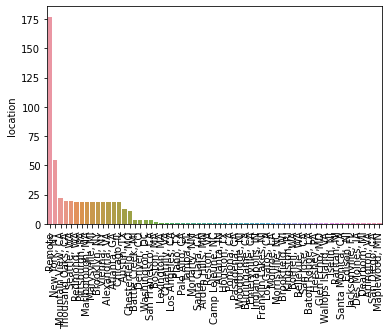

graph for company_size


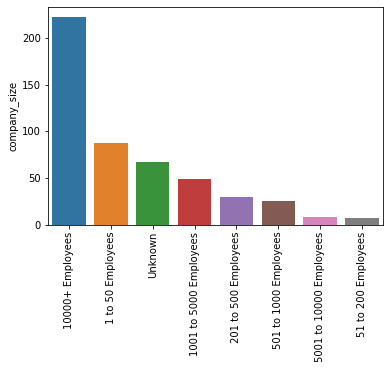

graph for company_type


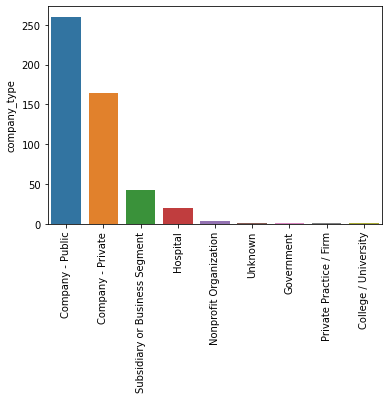

graph for company_sector


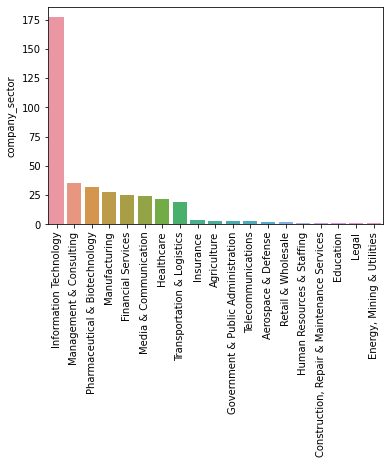

graph for company_industry


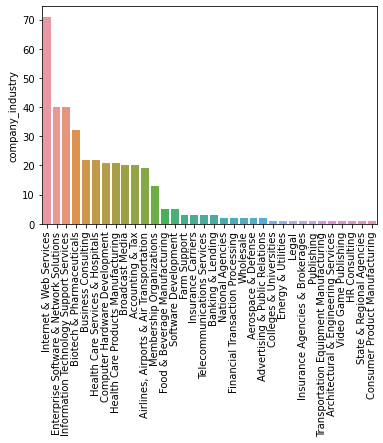

graph for company_revenue


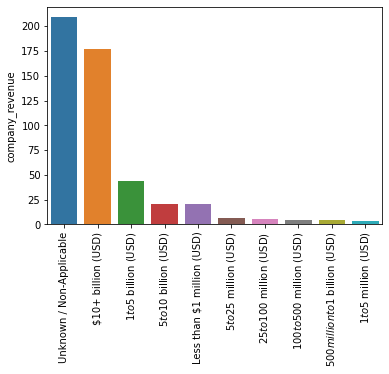

graph for python_yn


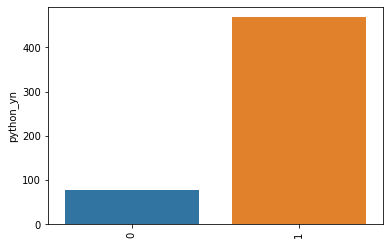

graph for spark_yn


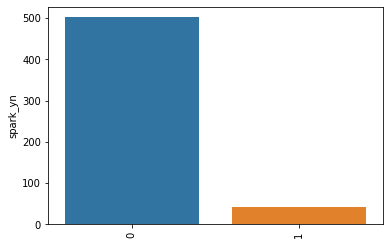

graph for azure_yn


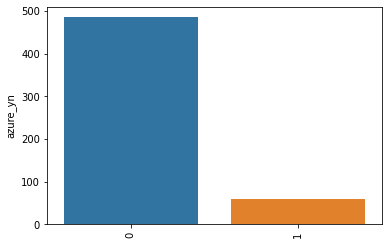

graph for aws_yn


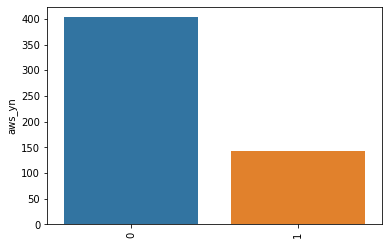

graph for excel_yn


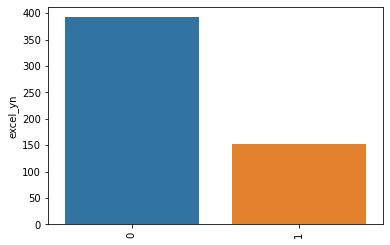

graph for machine_learning_yn


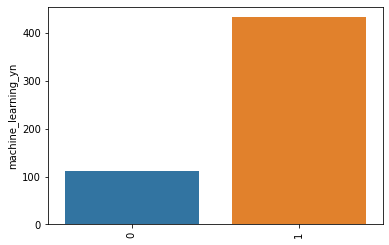

graph for job_simpl


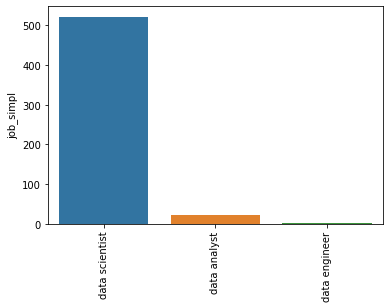

graph for seniority


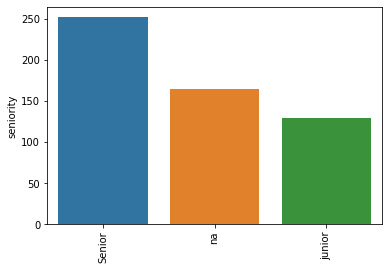

In [53]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for",i)
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()